In [1]:
import pandas as pd

In [ ]:
# loading clean data for analysis

In [ ]:
# creating new column Percentage from all available three sciores and creating grade from avg scores

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

print(df.to_string())

     gender race/ethnicity parental level of education         lunch test preparation course  math score  reading score  writing score
0    female        group B           bachelor's degree      standard                    none          72             72             74
1    female        group C                some college      standard               completed          69             90             88
2    female        group B             master's degree      standard                    none          90             95             93
3      male        group A          associate's degree  free/reduced                    none          47             57             44
4      male        group C                some college      standard                    none          76             78             75
5    female        group B          associate's degree      standard                    none          71             83             78
6    female        group B                some college 

In [4]:
df["Percentage"]=(df["math score"]+df["reading score"]+df["writing score"])/3
print(df["Percentage"])

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Percentage, Length: 1000, dtype: float64


In [5]:
df['Percentage'] = (df['math score']+df['reading score']+df['writing score'])/3
print(df["Percentage"])


def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'

df["grade"] = df.apply(lambda x : Grade(x["Percentage"]),axis=1)

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Percentage, Length: 1000, dtype: float64


In [6]:
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72        

In [7]:
# using Seaborn for analysis

In [8]:
import seaborn as sns
import numpy as np

<ipython-input-11-ecf548b09676>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='gender', y ='Percentage', data = df,


<Axes: xlabel='gender', ylabel='Percentage'>

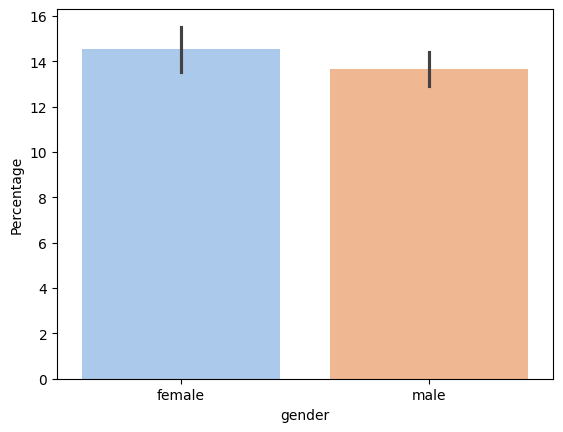

In [11]:
sns.barplot(x ='gender', y ='Percentage', data = df,
            palette ='pastel', estimator = np.std)

In [12]:
df['gender'].value_counts()

,count
gender,
female,518
male,482


In [13]:
import matplotlib.pyplot as plt

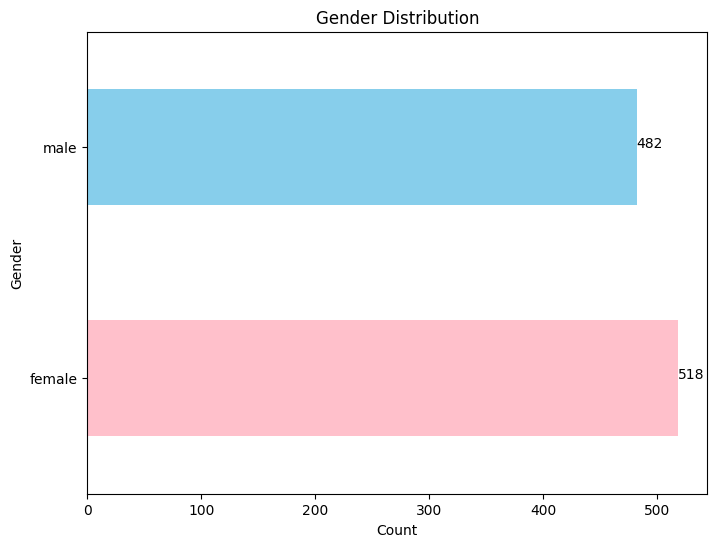

In [17]:
# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Create a horizontal bar plot
plt.figure(figsize=(8,6))
ax = gender_counts.plot(kind='barh', color=['pink', 'skyblue'])

# Set title and labels
plt.title('Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')

# Add data labels
for index, value in enumerate(gender_counts):
    plt.text(value, index, str(value))

# Save the plot as a PNG file
plt.savefig("Gender_Distribution_HorizontalBarPlot.png")

plt.show()


In [ ]:
# Below countplot illustares the grade secured by female and male

<Figure size 1000x600 with 0 Axes>

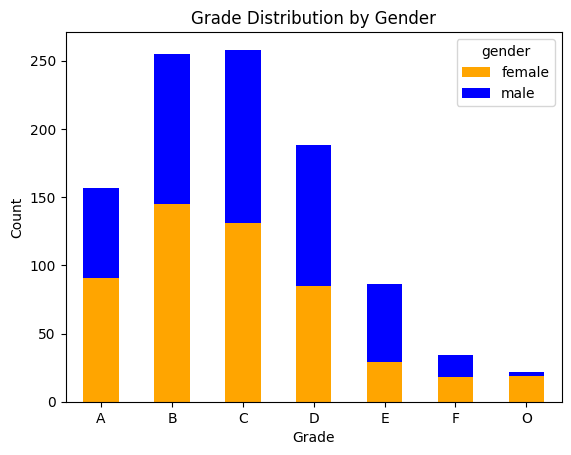

In [23]:
# Count the occurrences of each grade by gender
grade_gender_counts = df.groupby(['grade', 'gender']).size().unstack()

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
ax = grade_gender_counts.plot(kind='bar', stacked=True, color=['orange', 'blue'])

# Set title and labels
plt.title('Grade Distribution by Gender')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels for better readability

# Save the plot as a PNG file
plt.savefig("Grade_Distribution_StackedBarPlot.png")

plt.show()

In [ ]:
# Below countplot illustrates the grades secured by students grouped by ethinicity

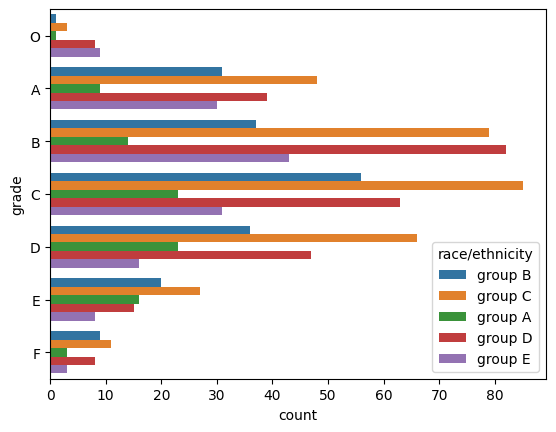

In [25]:
ax = sns.countplot(y="grade", hue="race/ethnicity", data=df, order=["O","A","B","C","D","E","F"])
fig=ax.get_figure()
fig.savefig("Grade_Analysis_race.png")

In [ ]:
# below countplot illustates the gardes secured by stuidents and their parenta; level of

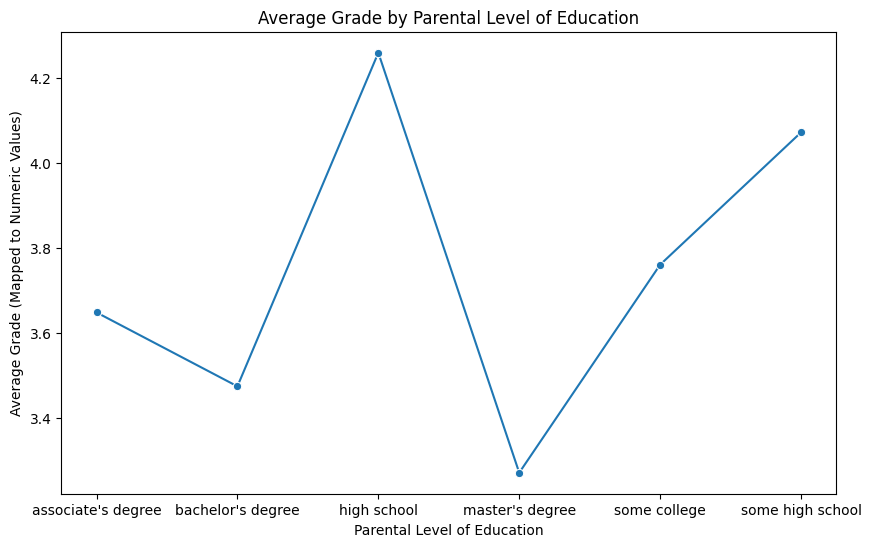

In [28]:
# Map grades to numerical values for better plotting
grade_mapping = {'O': 1, 'A': 2, 'B': 3, 'C': 4, 'D': 5, 'E': 6, 'F': 7}
df['grade_num'] = df['grade'].map(grade_mapping)

# Calculate the average grade for each parental level of education
average_grades = df.groupby('parental level of education')['grade_num'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='parental level of education', y='grade_num', data=average_grades, marker='o')

# Set title and labels
plt.title('Average Grade by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Grade (Mapped to Numeric Values)')

# Save the plot as a PNG file
plt.savefig("Grade_Analysis_LinePlot.png")

plt.show()


In [ ]:
# below countplot illustrates the grade secured by students grouped by their lunch. It shows how lunch
#effects teh student poerformance.

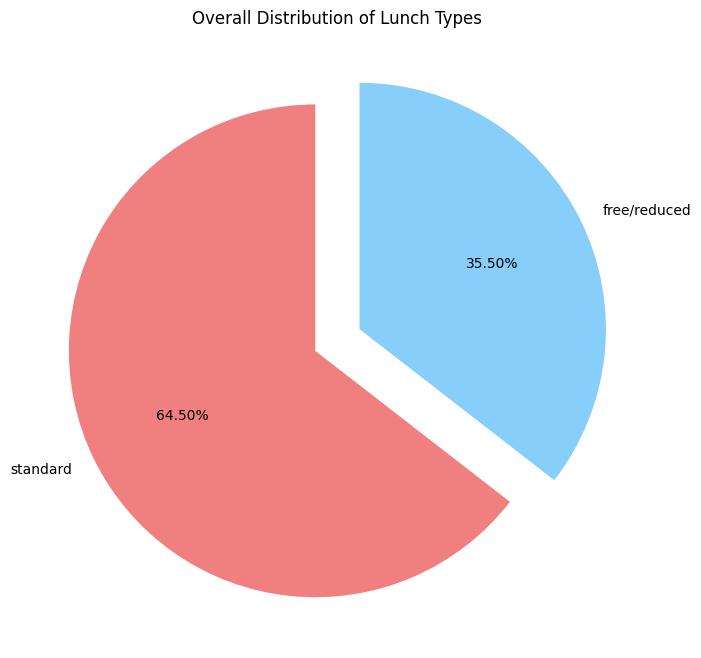

In [36]:
# Calculate the counts of each lunch type overall
lunch_counts = df['lunch'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(lunch_counts, labels=lunch_counts.index, explode=[0.1]*len(lunch_counts),
        autopct='%1.2f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])

plt.title('Overall Distribution of Lunch Types')

# Save the plot as a PNG file
plt.savefig("Overall_Lunch_Distribution.png")

plt.show()


In [ ]:
# Below count plot illustrates hoe course completion effects the student grade

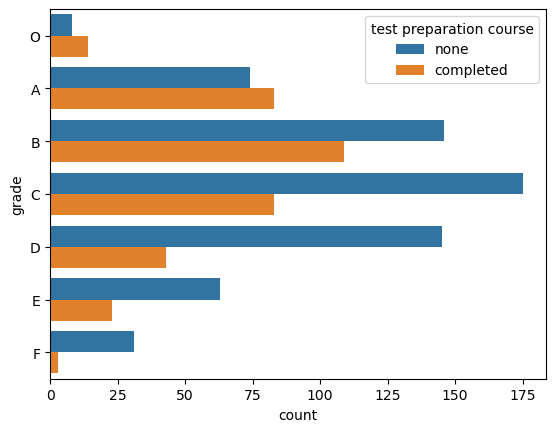

In [ ]:
ax = sns.countplot(y="grade", hue="test preparation course", data=df, order=["O","A","B","C","D","E","F"])
fig=ax.get_figure()
fig.savefig("C:/Users/Likhita/OneDrive/Documents/Grade_Analysis_test_prepartion.png")

In [ ]:
# below plot illustrates the distibution of avg marks or percentage of score secured by all students.
#we can see more students scored percentage between 50 to 80

<ipython-input-39-4254b5d93092>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df['Percentage'], kde = False, color ='orange', bins = 30)


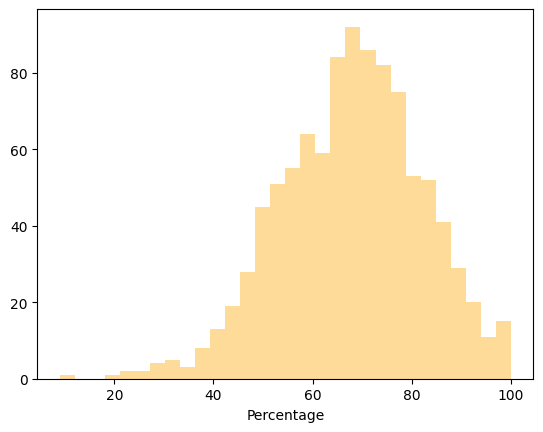

In [39]:
ax=sns.distplot(df['Percentage'], kde = False, color ='orange', bins = 30)
fig=ax.get_figure()
fig.savefig("Distribution_percentage.png")

In [ ]:
# below scatter plot illustrates how the relation between avg score and math score and grouped by gender

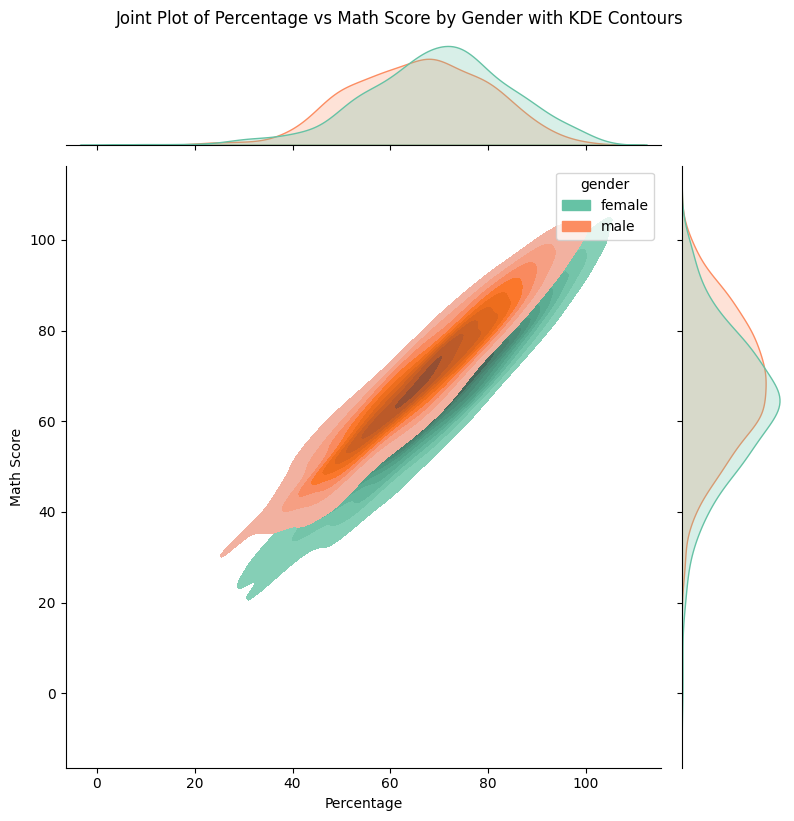

In [42]:
# Create a joint plot with KDE contours and different colors for gender
ax = sns.jointplot(x='Percentage', y='math score', hue='gender', data=df,
                   palette='Set2', kind='kde', fill=True, height=8)

# Set titles and labels
ax.fig.suptitle('Joint Plot of Percentage vs Math Score by Gender with KDE Contours', y=1.02)
ax.set_axis_labels('Percentage', 'Math Score')

# Save the plot as a PNG file
plt.savefig("JointPlot_KDE_Percentage_MathScore.png")

plt.show()


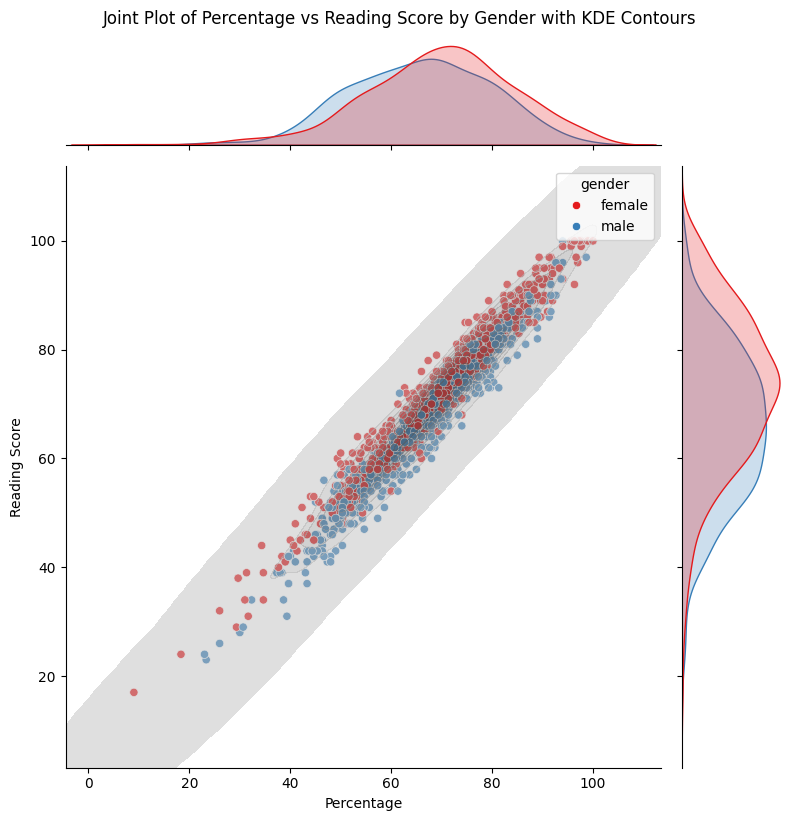

In [51]:


# Create a joint plot with scatter and KDE contours, colored by gender
ax = sns.jointplot(x='Percentage', y='reading score', data=df,
                   kind='scatter', hue='gender',
                   palette='Set1', height=8)

# Add KDE contours
sns.kdeplot(data=df, x='Percentage', y='reading score',
            fill=True, thresh=0, levels=10, color='gray', alpha=0.5)

# Set titles and labels
ax.fig.suptitle('Joint Plot of Percentage vs Reading Score by Gender with KDE Contours', y=1.02)
ax.set_axis_labels('Percentage', 'Reading Score')

# Save the plot as a PNG file
plt.savefig("JointPlot_Scatter_KDE_Percentage_ReadingScore.png")

plt.show()


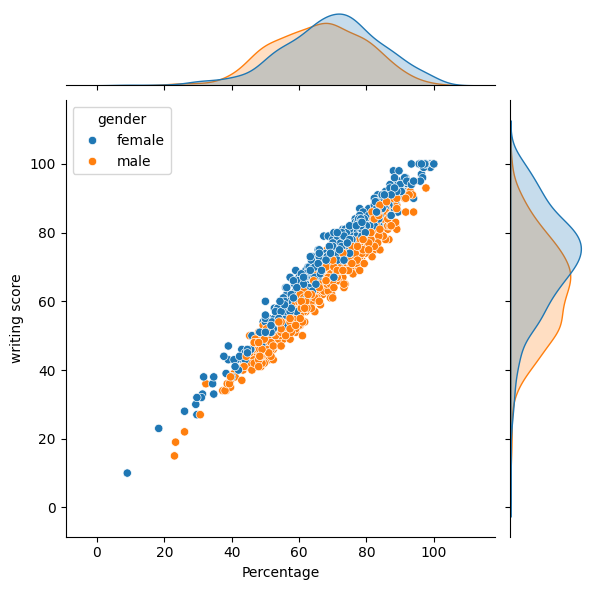

In [53]:
ax=sns.jointplot(x ='Percentage', y ='writing score',hue="gender", data = df)